<a href="https://colab.research.google.com/github/srimanthtenneti/Playing_With_Gaussians/blob/main/Gaussians101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 

# Gaussian Probability Distribution Function 
def gpdf (mu, var, x): 
  coff = 1 / ((2.*np.pi*var)**0.5)
  expp = np.exp(-((x - mu)**2) / 2. * var)
  return coff * expp

In [38]:
gpdf(10., 4., 10) # Gaussian Probability Distribution Function 

0.19947114020071635

In [82]:
# Distribution Update Step 
def update (mu1, var1, mu2, var2) : 
  mu = ((var2 * mu1) + (var1 * mu2)) / (var1 + var2) 
  var = 1 /(1/var1 + 1/var2)
  return (mu, var)

def predict (mu1, var1, mu2, var2) : 
  mu = mu1 + mu2 
  var = var1 + var2 
  return (mu, var)

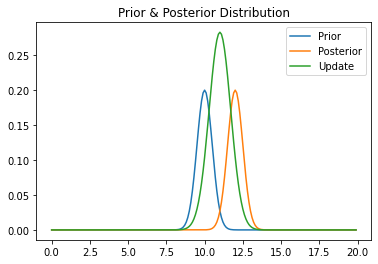

In [81]:
# Test 
mu1 = 10
var1 = 4
mu2 = 12
var2 = 4

dis = np.arange(0, 20, 0.1)

prior_pdf = gpdf(mu1, var1, dis)
posterior_pdf = gpdf(mu2, var2, dis)

update_mu, update_var = update(mu1, var1, mu2, var2)

updated_pdf = gpdf(update_mu, update_var, dis)

plt.title("Prior & Posterior Distribution")
plt.plot(dis, prior_pdf)
plt.plot(dis, posterior_pdf)
plt.plot(dis, updated_pdf)
plt.legend(['Prior', 'Posterior', 'Update'])

In [92]:
measurments = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

mva = 4. 
mova = 2. 

mu  = 0.
va = 10000. 

gp = []

for m, mo in zip(measurments, motions) : 
  mupm, mupv = update(mu, va, m, mva)
  moupm, moupva = predict(mu, va, mo, mova)
  gp.append(gpdf(mupm, mupv, dis))
  print("Measurment Updates -> Mean {}, Variance {}".format(mupm, mupv))
  print("Motion Updates -> Mean {}, Variance {}".format(moupm, moupva))

print("**************************Final ***********************************")
print("Final Measurment Update -> Mean {}, Variance {}".format(mupm, mupv))
print("Final Motion Update -> Mean {}, Variance {}".format(moupm, moupva))

Measurment Updates -> Mean 4.998000799680128, Variance 3.9984006397441023
Motion Updates -> Mean 1.0, Variance 10002.0
Measurment Updates -> Mean 5.997600959616154, Variance 3.9984006397441023
Motion Updates -> Mean 1.0, Variance 10002.0
Measurment Updates -> Mean 6.997201119552179, Variance 3.9984006397441023
Motion Updates -> Mean 2.0, Variance 10002.0
Measurment Updates -> Mean 8.99640143942423, Variance 3.9984006397441023
Motion Updates -> Mean 1.0, Variance 10002.0
Measurment Updates -> Mean 9.996001599360255, Variance 3.9984006397441023
Motion Updates -> Mean 1.0, Variance 10002.0
**************************Final ***********************************
Final Measurment Update -> Mean 9.996001599360255, Variance 3.9984006397441023
Final Motion Update -> Mean 1.0, Variance 10002.0


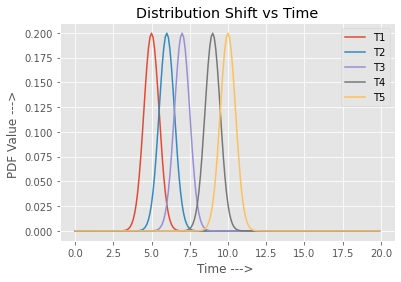

In [121]:
plt.title("Distribution Shift vs Time")

plt.ylabel("PDF Value ---> ")
plt.xlabel("Time ---> ")

plt.plot(dis, gp[0])
plt.plot(dis, gp[1])
plt.plot(dis, gp[2])
plt.plot(dis, gp[3])
plt.plot(dis, gp[4])

plt.legend(['T1', 'T2', 'T3', 'T4', 'T5'])